In [1]:
# %pip install numpy matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Image structure: Single/Multi-channel images

Images in digital processing are represented as arrays of pixels, where each pixel can have one or more values associated with it. In a grayscale image, each pixel has a single value representing its intensity, ranging from black through various shades of gray to white. These images are considered single-channel because they contain only one layer of data per pixel.

Color images often use multiple channels to represent the colors in an image, typically using the RGB (Red, Green, Blue) color model. Each pixel in an RGB image has three values associated with it, each representing the intensity of red, green, and blue. 

**Learning goals**
1. Reading single and multi-channel images using `imread` and understanding the structure.
2. Displaying the image and basic usage of colormaps, vmin, vmax


| Method | Explanation |
| ------ | ----------- |
| `plt.imread(filepath)` | Reads an image from a file into an array. |
| `image.shape` | Returns the dimensions of the image array, indicating height, width, and number of channels. |
| `image.ndim` | Provides the number of dimensions in the image array (e.g., 2 for grayscale, 3 for RGB). |
| `image.dtype` | Indicates the data type of the image array elements (e.g., uint8, float32). |
| `plt.imshow(image, cmap='gray', vmin=0, vmax=0)` | Displays an image from an array, with optional parameters like `cmap`, `vmin`, and `vmax`. |
| `plt.colorbar()` | Adds a colorbar to the image plot to represent the color scale based on image intensity. |
| `np.mean(image, axis=2)` | Calculates the mean across the specified axis. |
| `np.max(image, axis=2)` | Finds the maximum value across the specified axis. |
| `plt.hist(data, bins=256)` | Plots a histogram of the data. |
| `data.ravel()` | Flattens the image data into a 1D array. |


**Example** Read `img/image_1.png` and display its shape, number of dimensions, and dtype

In [3]:
image = plt.imread('img/image_1.png')
image.shape, image.ndim, image.dtype

((3, 3), 2, dtype('float32'))

Read `img/image_2.png` and display its shape, number of dimensions, and dtype

In [7]:
image2 = plt.imread('img/image_2.png')
image2.shape, image2.ndim, image2.dtype

((3, 3), 2, dtype('float32'), (3, 3))

Read and display `img/example_color.png`. How is it different from image_2?

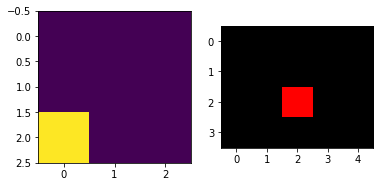

In [28]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(image2)

image_col = plt.imread('img/example_color.png')
ax[1].imshow(image_col)

# image_col = plt.imread('img/example_color.png')
# plt.imshow(image_col)
# image_col.shape

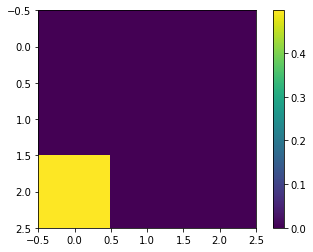

In [19]:
plt.imshow(image2)
plt.colorbar()

`example_color.png` has three dimensions. It is 4x5 pixels image. Additionally, it also has three channels (Red-R, Green-G, Blue-B) which is the 3 in (4, 5, 3). 

`image_2` is 3x3 pixels image and has only one channel. Multiple channels are used in creation of composite images. We will learn more about this in upcoming sections. Now let's learn how to display images.


**Example** Read and display `img/image_1.png`

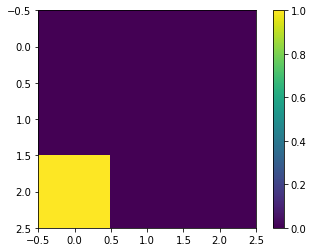

In [18]:
image = plt.imread('img/image_1.png')
plt.imshow(image)
plt.colorbar()

`image_2.png` has an active pixel in same location as image_1.png. However, the intensity is lesser. Can you see the difference in intensity just by looking at the plot?

Read and display `img/image_2.png`

In [16]:
image, image2

(array([[0., 0., 0.],
        [0., 0., 0.],
        [1., 0., 0.]], dtype=float32),
 array([[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.49803922, 0.        , 0.        ]], dtype=float32))

Nope! 

Read and display `img/image_1.png` with a colorbar. What are the minimum and maximum values by looking at the colorbar?

Hint: Use `plt.colorbar();`

Read and display `img/image_2.png` with a colorbar. What are the minimum and maximum values by looking at the colorbar? 
Now do you see the difference between the two images?

You can specify lower and upper bounds of colorbar by setting `vmin` and `vmax`. This can help with comparison

Read and display `img/image_2.png` with a colorbar and set vmin to 0 and vmax to 1.

Hint: plt.imshow(image, vmin=value_vmin, vmax=value_vmax)

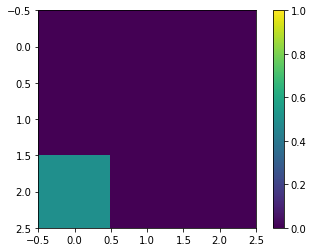

In [21]:
plt.imshow(image2, vmin=0, vmax=1)
plt.colorbar()

Let's look at multi-channel images.
 
How does `image_3.png` look like with a colorbar? Do you see something odd?

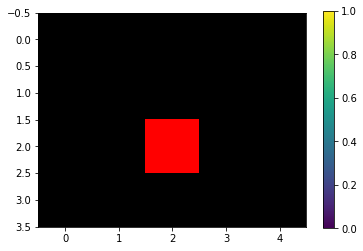

In [22]:
image_col = plt.imread('img/example_color.png')
plt.imshow(image_col)
plt.colorbar()

Try changing colormap to gray by setting cmap='gray' in plt.imshow(). Does this help?

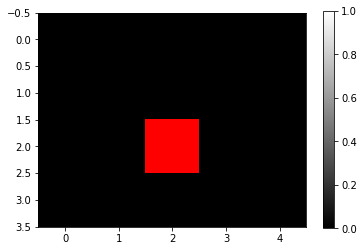

In [23]:
plt.imshow(image_col, cmap='gray')
plt.colorbar()

When you load an image using `plt.imread` and then display it with `plt.imshow`, specifying `cmap='gray'` should display the image in grayscale, regardless of the image format (PNG, JPG, etc.). However, if the image naturally contains color information (e.g., RGB channels), Matplotlib will display the image in color if you do not explicitly convert it to grayscale.

**Example** Convert image to grayscale by taking mean across all channels and display grayscale image with colorbar. 

Specifying axis=2 takes mean across all the channels

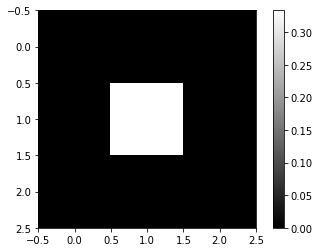

In [24]:
image = plt.imread('img/image_3.png')
grayscale_image = np.mean(image, axis=2) # converting to grayscale by taking mean across all channels (axis=2)
plt.imshow(grayscale_image, cmap='gray')
plt.colorbar();

You can also take max/min etc. However, mean is often preferred. Convert image to grayscale by taking maximum across all channels and display grayscale image with colorbar. 

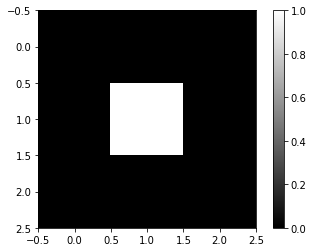

In [25]:
grayscale_image = np.max(image, axis=2) # converting to grayscale by taking mean across all channels (axis=2)
plt.imshow(grayscale_image, cmap='gray')
plt.colorbar();

## Exploring image channels of a color image individually

**Learning goals**
1. Separating R, G, and B channels of an image.
2. Intensity distribution visualization through histograms.
3. (For fun) swapping channels

For the section on separating channels, here's a markdown table summarizing the methods used along with one-line explanations:

| Method | Explanation |
| ------ | ----------- |
| `plt.imread('path/to/image')` | Loads an image from the specified path into an array. |
| `image[:,:,0]` | Extracts the first channel (red in an RGB image) from the image array. |
| `plt.imshow(channel, cmap='gray')` | Displays a single channel (grayscale) image with a specified colormap. |
| `np.zeros_like(image)` | Creates a zero array with the same shape and type as the given image, used to nullify color channels. |
|`plt.hist(array)`| Plots histogram of an array |

This table covers the basics of loading images, accessing and manipulating individual color channels, visualizing channels, and recombining channels into composite images.

**Example** Plot only red channel of `img/image_3`

`image_3` has values only in red channel and blue and green channels are 0.

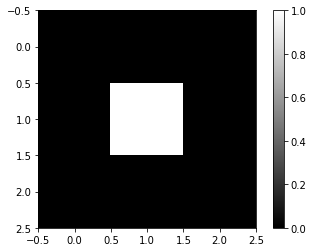

In [39]:
image = plt.imread('img/image_3.png')
red_channel = image[:, :, 0]
plt.imshow(red_channel, cmap='gray', vmin=0, vmax=1)
plt.colorbar();

Plot only green channel of `img/image_3`. Does it make sense? 

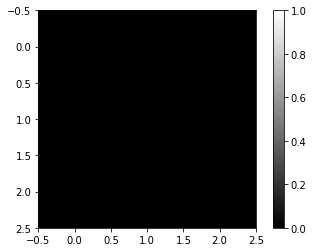

In [40]:
green_channel = image[:, :, 1]
plt.imshow(green_channel, cmap='gray', vmin=0, vmax=1)
plt.colorbar();

Plot only blue channel of `img/image_3`. Does this look good?

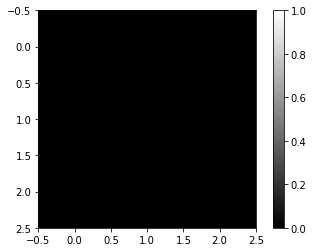

In [41]:
blue_channel = image[:, :, 2]
plt.imshow(blue_channel, cmap='gray', vmin=0, vmax=1)
plt.colorbar();

Let's try with some 1-photon imaging data. Display only the red channel of `img/1p_maxproj.png` in grayscale.

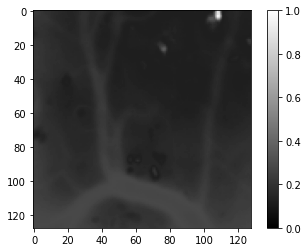

In [42]:
image = plt.imread('img/1p_maxproj.png')
red_channel = image[:, :, 0]
plt.imshow(red_channel, cmap='gray', vmin=0, vmax=1)
plt.colorbar();

How does the green channel of `img/1p_maxproj.png` in grayscale look?

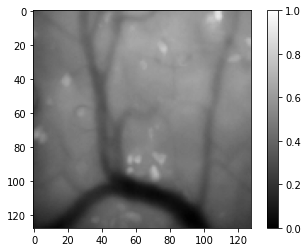

In [37]:
green_channel = image[:, :, 1]
plt.imshow(green_channel, cmap='gray', vmin=0, vmax=1)
plt.colorbar();

Display only the blue channel of `img/1p_maxproj.png` in grayscale

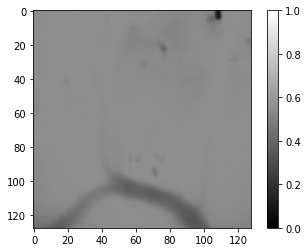

In [36]:
blue_channel = image[:, :, 2]
plt.imshow(blue_channel, cmap='gray', vmin=0, vmax=1)
plt.colorbar();

**Example** Plot histogram of values in the red channel

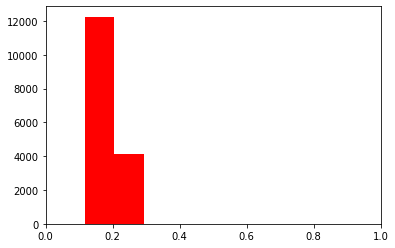

In [35]:
image = plt.imread('img/1p_maxproj.png')
red_channel = image[:, :, 0]
plt.hist(red_channel.ravel(), color='red')
plt.xlim(0, 1);

Plot histogram of values in the green channel

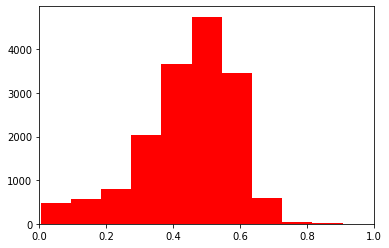

In [43]:
image = plt.imread('img/1p_maxproj.png')
green_channel = image[:, :, 1]
plt.hist(green_channel.ravel(), color='red')
plt.xlim(0, 1);

Plot histogram of values in the blue channel

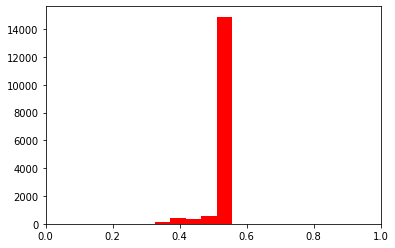

In [44]:
image = plt.imread('img/1p_maxproj.png')
blue_channel = image[:, :, 2]
plt.hist(blue_channel.ravel(), color='red')
plt.xlim(0, 1);

**Example** For fun, let's swap red and green channels and visualize the image

Red, Green, and Blue channels are stored in this order in the third dimension (axis) of the image. 
[0, 1, 2] represents red, green, and blue channels. To swap, we only have to change the order of the numbering in the third dimension of the image.

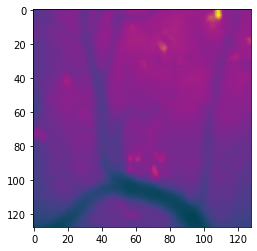

In [45]:
image = plt.imread('img/1p_maxproj.png')
swapped_image = image[:, :, [1, 0, 2]]  # Swap red and green
plt.imshow(swapped_image)

let's swap blue and green channels and visualize the image

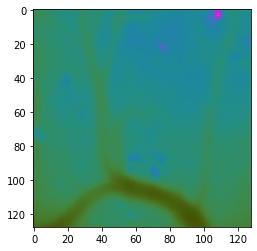

In [46]:
image = plt.imread('img/1p_maxproj.png')
swapped_image = image[:, :, [0, 2, 1]]  # Swap red and green
plt.imshow(swapped_image)

let's swap red and blue channels and visualize the image

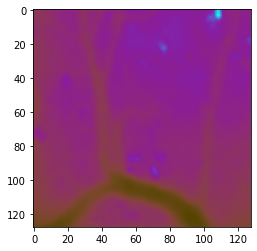

In [47]:
image = plt.imread('img/1p_maxproj.png')
swapped_image = image[:, :, [2, 0, 1]]  # Swap red and green
plt.imshow(swapped_image)

## Highlighting sections of image 

Cropping is a straightforward technique to isolate specific sections of an image. By selecting a subset of rows and columns, you can focus on areas of interest. This is especially useful in large images where details in smaller regions might be overlooked.

The choice of colormap (cmap) and the use of vmin and vmax parameters affect the perception of image data. Different colormaps can highlight different features in the data. By adjusting vmin and vmax, you can control the range of data values mapped to the colormap, highlighting specific intensity ranges.

**Learning goals**
1. Cropping to zoom into section of an image by using array slicing.
2. Making use of cmap, vmin, and vmax to highlight sections of images

For the section on highlighting sections of images, here's a markdown table summarizing the methods used along with one-line explanations:

| Method | Explanation |
| ------ | ----------- |
| `plt.imread(filepath)` | Reads an image from a file into an array. |
| `image[row_start:row_end, col_start:col_end]` | Crops the image to include only a specified portion by rows and columns. |
| `plt.imshow(image, cmap='X', vmin=Y, vmax=Z)` | Displays an image with a specified colormap (`'gray'`, `'jet'`, `'viridis'`) and intensity range using `vmin` and `vmax`. |
| `np.mean(image, axis=2)` | Calculates the mean along the specified axis (used to convert to grayscale if the image is RGB). |
| `np.percentile(data, N)` | Calculates the Nth percentile of the data, used to determine intensity thresholds for highlighting. |
| `np.vstack([array]*N)` | Stacks an array N times vertically to create a 2D array from a 1D array, useful for visualization purposes. |

**Example** Crop `img/1p_maxproj.png` to include only the portion from the 50th row to the last row, and include all columns.

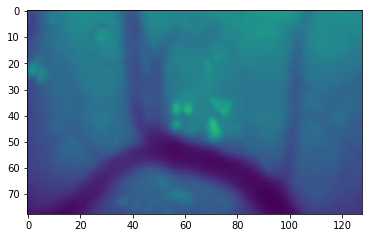

In [49]:
image = plt.imread('img/1p_maxproj.png')
cropped_image = image[50:, :]  
plt.imshow(cropped_image);

Crop `img/1p_maxproj.png` to include only the portion from the 50th row to the 100th row, and include all columns.

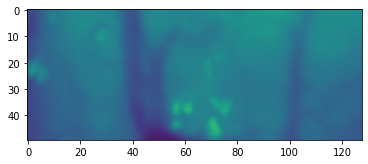

In [50]:
image = plt.imread('img/1p_maxproj.png')
cropped_image = image[50:100, :]  
plt.imshow(cropped_image);

Crop `img/1p_maxproj.png` to include only the portion from the 50th to the 100th row and column.

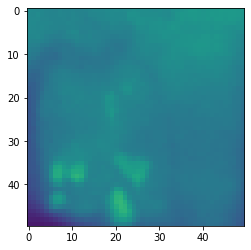

In [51]:
image = plt.imread('img/1p_maxproj.png')
cropped_image = image[50:100,50:100]  
plt.imshow(cropped_image);

Choosing right kind of `cmap` help in getting most out of a visualization. On the downside, choosing wrong `cmap` can also lead to visualisations that can be difficult to interpret. Let's use an example to see this in action.

**Example** How many waves do you see in this image?

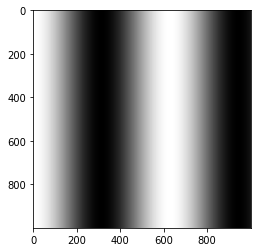

In [52]:
x = np.linspace(0, 10, 1000)
y = np.cos(x)
frame = np.vstack([y]*1000)
plt.imshow(frame, cmap='gray');

Change cmap to 'jet' in the previous example. How many waves do you see in this image? Is it easier or difficult to count the number of waves in this cmap or the previous?

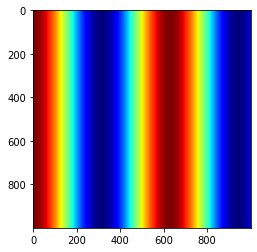

In [53]:
x = np.linspace(0, 10, 1000)
y = np.cos(x)
frame = np.vstack([y]*1000)
plt.imshow(frame, cmap='jet');

Change cmap to 'viridis' in the previous example. How many waves do you see in this image? Is this closer to the grayscale image?

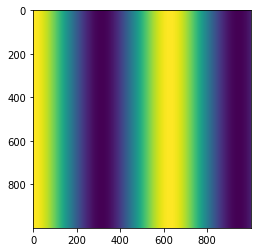

In [54]:
x = np.linspace(0, 10, 1000)
y = np.cos(x)
frame = np.vstack([y]*1000)
plt.imshow(frame, cmap='viridis');

**Example** Using `img/1p_maxproj.png`, display the original grayscale data alongside a version highlighting values above 25th percentile. Apply gray colormap and adjust the display with `vmin` and/or `vmax` to emphasize the higher intensity regions.

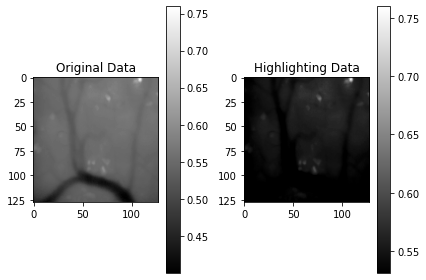

In [57]:
image = plt.imread('img/1p_maxproj.png')
data = np.mean(image, axis=2)

lower_percentile = np.percentile(data, 25)  

plt.subplot(1, 2, 1)
plt.title("Original Data")
plt.imshow(data, cmap='gray')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Highlighting Data")
plt.imshow(data, cmap='gray', vmin=lower_percentile)
plt.colorbar();

plt.tight_layout()

Using `img/1p_maxproj.png`, display the original grayscale data alongside a version highlighting the bottom 25% of values. Apply gray colormap and adjust the display with `vmin` and/or `vmax` to emphasize the higher intensity regions.

In [ ]:
image = plt.imread('img/1p_maxproj.png')
data = np.mean(image, axis=2)

lower_percentile = np.percentile(data, 25)  

plt.subplot(1, 2, 1)
plt.title("Original Data")
plt.imshow(data, cmap='gray')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Highlighting Data")
plt.imshow(data, cmap='gray', vmin=lower_percentile)
plt.colorbar();

plt.tight_layout()

Using `img/1p_maxproj.png`, display the original grayscale data alongside a version highlighting the middle 50% of values. Apply gray colormap and adjust the display with `vmin` and/or `vmax` to emphasize the higher intensity regions.

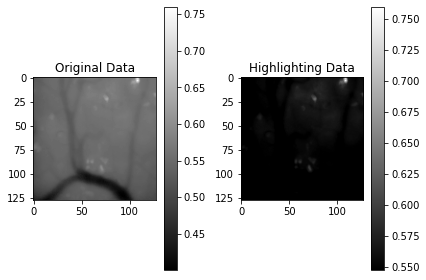

In [58]:
image = plt.imread('img/1p_maxproj.png')
data = np.mean(image, axis=2)

lower_percentile = np.percentile(data, 50)  

plt.subplot(1, 2, 1)
plt.title("Original Data")
plt.imshow(data, cmap='gray')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Highlighting Data")
plt.imshow(data, cmap='gray', vmin=lower_percentile)
plt.colorbar();

plt.tight_layout()

## Making composite images

We saw how to separate channels. Now we will learn how to combine them. This section we will work on creation of composite images using individual color channels to form bi-chromatic images and full-color composite images.

**Learning goals**
1. Making bi-chromatic images
2. Make composite images from rgb channels

| Method | Explanation |
| ------ | ----------- |
| `np.zeros_like(array)` | Creates an array of zeros with the same shape and type as a given array. |
| `np.stack((array1, array2, array3), axis=2)` | Stacks arrays along a new axis. This is used to combine separate single-channel images into one multi-channel image. |
| `np.mean(array, axis=2)` | Calculates the mean across the specified axis, useful for converting RGB images to grayscale by averaging the color channels. |
| `(array - np.min(array)) / (np.max(array) - np.min(array))` | Normalizes an array to have values between 0 and 1, based on its minimum and maximum values. This is crucial for balancing color channels in a composite image. |

Run the below cell to make a fake image.

In [59]:
red_channel = np.array([
    [0., 0., 0.],
    [0., 1., 0.],
    [0., 0., 0.1]
])

green_channel = np.array([
    [0.5, 0., 0.],
    [0., 1., 0.],
    [0., 0., 0.2]
])

blue_channel = np.array([
    [0., 0., 0.7],
    [0., 0., 0.],
    [0.5, 0., 0.3]
])

**Example** Create a bi-chromatic image from red and blue channels (make green channel 0).

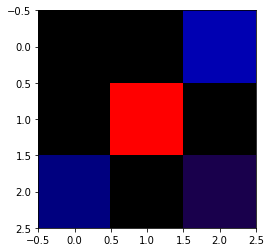

In [60]:
combined_image = np.stack((red_channel, np.zeros_like(red_channel), blue_channel), axis=2)
plt.imshow(combined_image)

Create a bi-chromatic image from green and blue channels (make red channel 0).

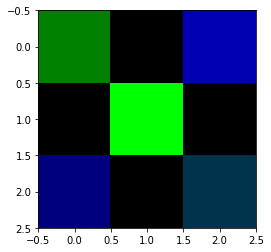

In [61]:
combined_image = np.stack((np.zeros_like(red_channel), green_channel, blue_channel), axis=2)
plt.imshow(combined_image)

Create a bi-chromatic image from red and green channels (make blue channel 0).

Make a composite image combining all the three channels.

**Example** Create a grayscale from the composite image

In [ ]:
combined_image = np.stack((red_channel, green_channel, blue_channel), axis=2)
manual_grayscale = np.mean(combined_image, axis=2)
plt.imshow(manual_grayscale, cmap='gray')
plt.colorbar();

Let's see how to combine imbalanced channels. Run the below cell to create an imbalanced data.

Notice the minimum and maximum in red, green, and blue channels. They are significantly different from each other. We have to normalize them individually before creating a composite image.

In [62]:
red_channel = np.array([
    [0., 0., 0.],
    [0., 500., 0.],
    [0., 0., 50.]
])

green_channel = np.array([
    [250., 0., 0.],
    [0., 500., 0.],
    [0., 0., 100.]
])

blue_channel = np.array([
    [0., 0., 350.],
    [0., 0., 0.],
    [175., 0., 150.]
])

Make composite image from these channels without normalizing the channels.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


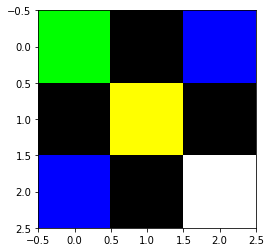

In [63]:
combined_image = np.stack((red_channel, green_channel, blue_channel), axis=2)
plt.imshow(combined_image);

Run the below code to normalize the channels separately and compare the plot with the previous plot

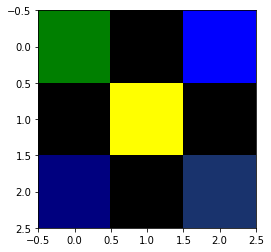

In [64]:
red_normalized = (red_channel - np.min(red_channel)) / (np.max(red_channel) - np.min(red_channel))
green_normalized = (green_channel - np.min(green_channel)) / (np.max(green_channel) - np.min(green_channel))
blue_normalized = (blue_channel - np.min(blue_channel)) / (np.max(blue_channel) - np.min(blue_channel))

# Stack the normalized channels to create a composite image
composite_image = np.stack((red_normalized, green_normalized, blue_normalized), axis=2)

# Display the composite image
plt.imshow(composite_image)

### Other references

1. `1p_maxproj.png` is the maximum projection of `data_endoscope.tif` which is a microendoscopic data from mouse dorsal striatum [Reference](https://elifesciences.org/articles/28728#s3).